Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw data (this will take a few seconds because it's huge)
print("Loading raw dataset...")
df_raw = pd.read_csv('../data/raw/time_series_60min_singleindex.csv', 
                     parse_dates=['utc_timestamp'], 
                     index_col='utc_timestamp')

print(" DATASET DIMENSIONS ")
print(f"Rows: {df_raw.shape[0]}")
print(f"Columns: {df_raw.shape[1]}") 

Loading raw dataset...
 DATASET DIMENSIONS 
Rows: 50401
Columns: 299


Examining Columns

In [5]:
print("--- All Columns ---")
print(df_raw.columns[:].tolist())

# Let's search for columns related to Germany (DE) to see our options
print("\n--- GERMANY (DE) COLUMNS FOUND ---")
de_cols = [col for col in df_raw.columns if 'DE_' in col]
print(de_cols[:]) 

--- All Columns ---
['cet_cest_timestamp', 'AT_load_actual_entsoe_transparency', 'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead', 'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual', 'BE_load_actual_entsoe_transparency', 'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual', 'BE_wind_generation_actual', 'BE_wind_offshore_generation_actual', 'BE_wind_onshore_generation_actual', 'BG_load_actual_entsoe_transparency', 'BG_load_forecast_entsoe_transparency', 'BG_solar_generation_actual', 'BG_wind_onshore_generation_actual', 'CH_load_actual_entsoe_transparency', 'CH_load_forecast_entsoe_transparency', 'CH_solar_capacity', 'CH_solar_generation_actual', 'CH_wind_onshore_capacity', 'CH_wind_onshore_generation_actual', 'CY_load_actual_entsoe_transparency', 'CY_load_forecast_entsoe_transparency', 'CY_wind_onshore_generation_actual', 'CZ_load_actual_entsoe_transparency', 'CZ_load_forecast_entsoe_transparency', 'CZ_solar_generation_actual', 'CZ_wind_onshore

Checking for Missing Values

--- MISSING VALUE REPORT ---
Total Columns with Missing Data: 298

Top 20 Columns with most missing values:
                                         Missing Values  Percentage (%)
HR_solar_generation_actual                        50391       99.980159
HR_wind_onshore_generation_actual                 50379       99.956350
PT_wind_offshore_generation_actual                47509       94.262019
PT_wind_generation_actual                         47509       94.262019
PL_solar_generation_actual                        46237       91.738259
HU_solar_generation_actual                        41436       82.212655
SK_wind_onshore_generation_actual                 40722       80.796016
NO_5_wind_onshore_generation_actual               40132       79.625404
NO_1_wind_onshore_generation_actual               35815       71.060098
DE_LU_load_forecast_entsoe_transparency           33745       66.953037
IE_sem_price_day_ahead                            32886       65.248705
DE_LU_load_actual_entsoe_tra

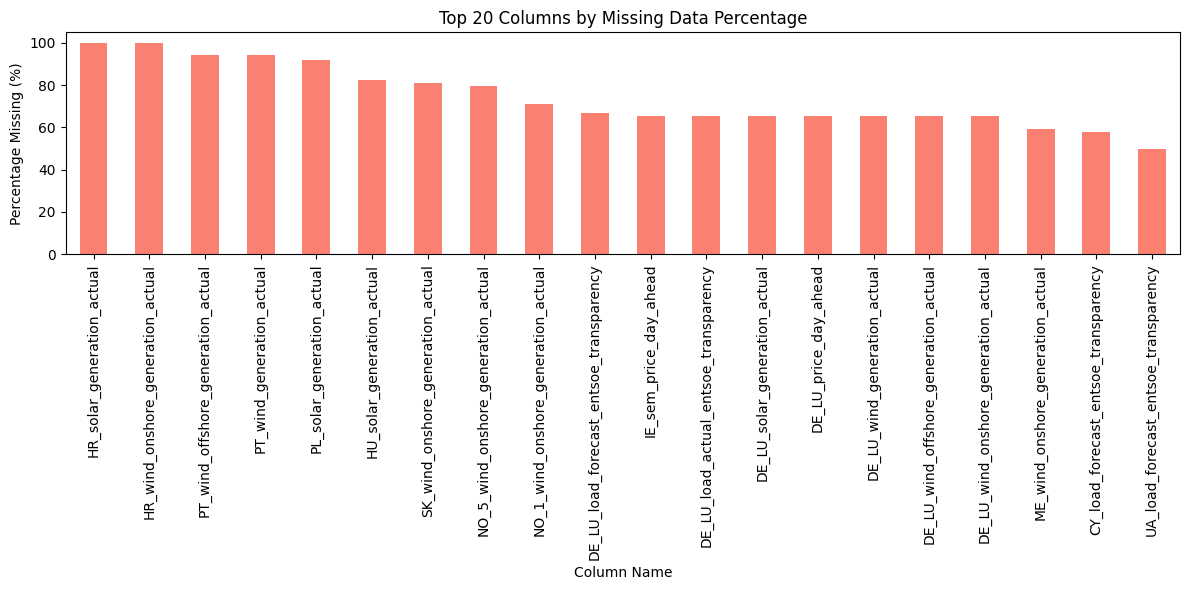

In [ ]:
print("--- MISSING VALUE REPORT ---")

# Calculate nulls for all columns
null_counts = df_raw.isnull().sum()
total_rows = len(df_raw)

# Filter to show only columns that actually have missing data
missing_data = null_counts[null_counts > 0].sort_values(ascending=False)

# Create a summary DataFrame for readability
missing_report = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': (missing_data / total_rows) * 100
})

# Display the top 20 columns with the most missing data
print(f"Total Columns with Missing Data: {len(missing_data)}")
print("\nTop 20 Columns with most missing values:")
print(missing_report.head(20))

# Visualization: Plot the missing data distribution for the top 20t
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_report['Percentage (%)'].head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 Columns by Missing Data Percentage')
plt.ylabel('Percentage Missing (%)')
plt.xlabel('Column Name')
plt.tight_layout()
plt.show()

# PROPOSAL FOR REDUCTION:
# The dataset has columns for many countries (AT, BE, DE, FR...).
# To keep the visualization focused, we will filter for:
# 1. DE (Germany) - Largest economy, complex grid.
# 2. FR (France) - Nuclear dominant, good comparison.
# 3. UK (United Kingdom) - Island grid.

# We will select only:
# - Actual Load (Consumption)
# - Solar Generation
# - Wind Generation
# - Prices